In [62]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression,LassoLarsIC,LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

warnings.filterwarnings("ignore")

In [2]:
# Load Titanic3 csv file
titanic_data = pd.read_csv('./titanic3.csv')

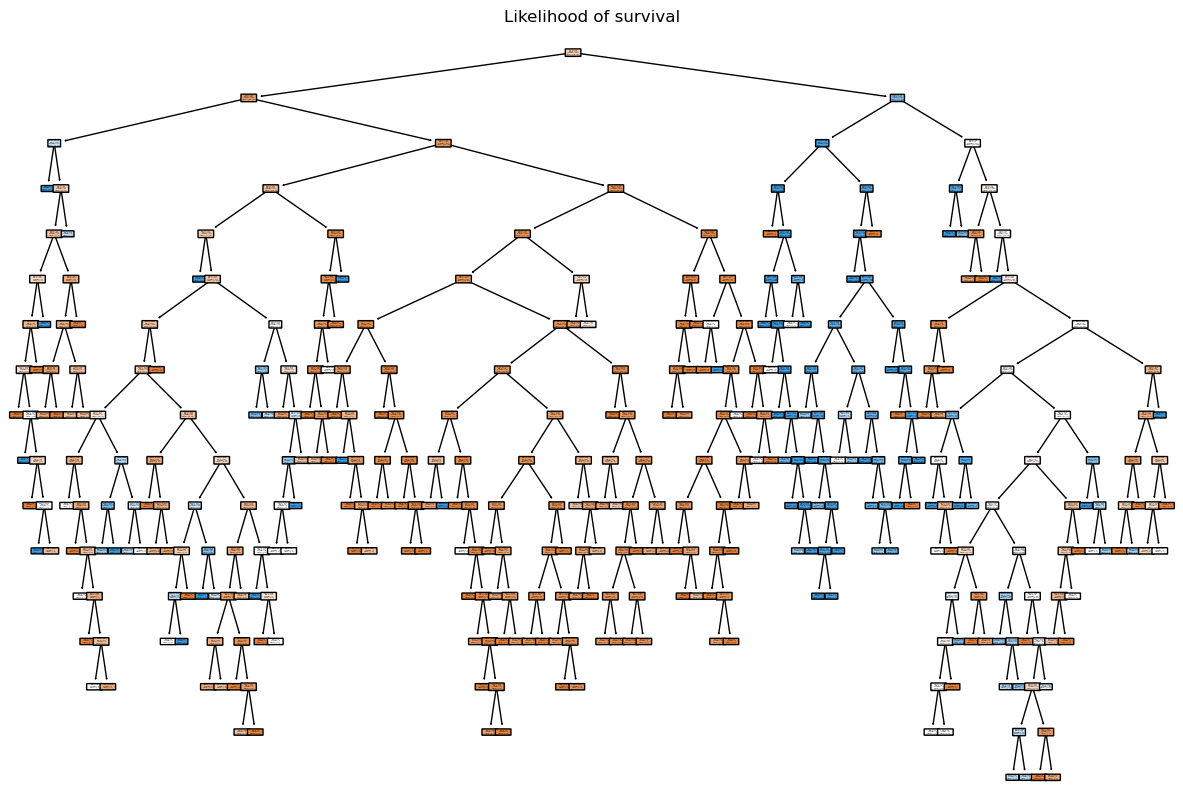

In [3]:
# extract features matrix and target variable
features = ['pclass', 'sex', 'age',]
X = titanic_data[features] # feature matrix
y = titanic_data['survived'] # target variable

# Convert categorical variables (Sex) to numerical
X['sex'] = X['sex'].map({'male': 0, 'female': 1})

# Handle missing values (e.g., fill missing ages with the mean)
X['age'].fillna(X['age'].mean(), inplace=True)

# # split data into train and testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of decision tree classifier 
clf_without_pruning = DecisionTreeClassifier()

# Fit the model on the training data
clf_without_pruning.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf_without_pruning, feature_names=features, filled=True, rounded=True, class_names=['Not Survived', 'Survived'])

plt.title("Likelihood of survival")
# plt.savefig("tree.png")
plt.show()

In [4]:
# measure performance of prune and unpruned trees

y_pred = clf_without_pruning.predict(X)

# Calculate evaluation metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)

print("Accuracy of Unpruned tree:", accuracy)
print("Miss classification Loss of Unpruned tree:", 1 - accuracy) # loss = 1 - accuracy

Accuracy of Unpruned tree: 0.8464476699770818
Miss classification Loss of Unpruned tree: 0.15355233002291824


# Cross validation

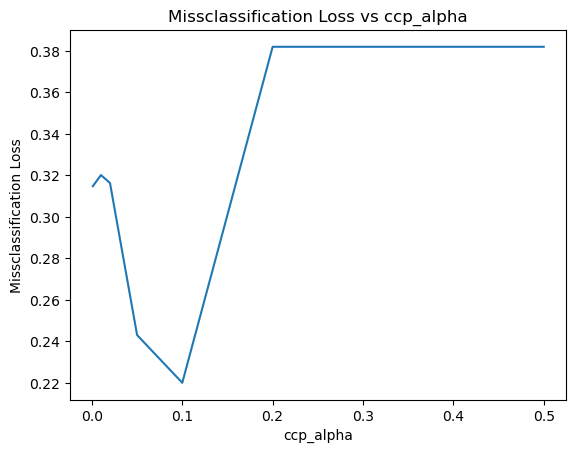

In [5]:
ccp_alpha_values = [0.001,0.01,0.02,0.05,0.1,0.2,0.5]
accuracy_scores = [] # to store accuracy scores for each ccp_alpha value
for ccp_alpha in ccp_alpha_values: 
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    score =  cross_val_score(clf, X, y)
    accuracy_scores.append(1-score.mean()) # append accuracy score for each ccp_alpha value
    

# Plot the accuracy scores for each ccp_alpha value
plt.plot(ccp_alpha_values, accuracy_scores) # plot accuracy scores for each ccp_alpha value
plt.xlabel('ccp_alpha') # x-axis label
plt.ylabel('Missclassification Loss') # y-axis label
plt.title('Missclassification Loss vs ccp_alpha') # plot title
plt.show() # show the plot    

In [6]:
# decision tree classifier with post-pruning
clf_pruned = DecisionTreeClassifier(ccp_alpha=0.07, random_state=42)
clf_pruned.fit(X, y)

y_pred = clf_pruned.predict(X)

# Calculate evaluation metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)

print("Accuracy of pruned tree:", accuracy)
print("Missclassification Loss of pruned tree:", 1 - accuracy) # loss = 1 - accuracy
print("Precision of pruned tree:", precision)

Accuracy of pruned tree: 0.7799847211611918
Missclassification Loss of pruned tree: 0.22001527883880823
Precision of pruned tree: 0.7274678111587983


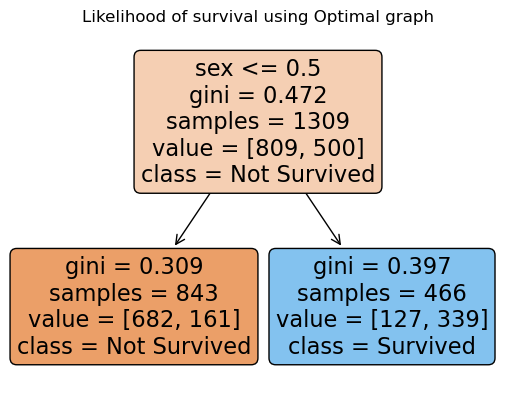

In [7]:
plot_tree(clf_pruned, feature_names=features, filled=True, rounded=True, class_names=['Not Survived', 'Survived'])
plt.title("Likelihood of survival using Optimal graph")
# plt.savefig("tree.png")
plt.show()

In [8]:
# logistic regression
lr = LogisticRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)

print("Accuracy of logistic regression:", accuracy)
print("Loss of logistic regression:", 1 - accuracy) # loss = 1 - accuracy
print("Precision of logistic regression:", precision)

Accuracy of logistic regression: 0.7853323147440795
Loss of logistic regression: 0.2146676852559205
Precision of logistic regression: 0.7354838709677419


# Question 3

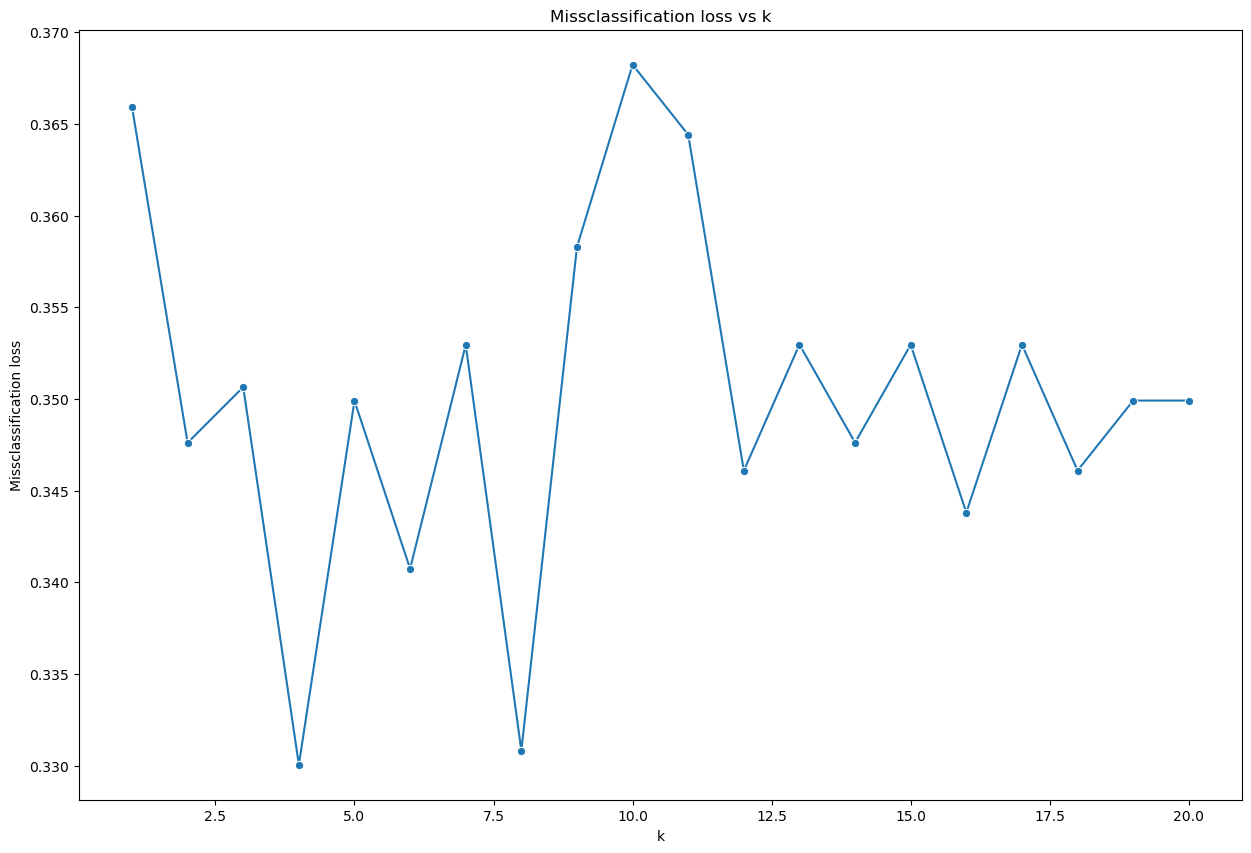

In [9]:
# KNN Cross validation
k_values = [i for i in range (1,21)]
scores = [] # to store accuracy scores for each k value
for k in k_values: 
    knn_model = KNeighborsClassifier(n_neighbors=k)
    score =  cross_val_score(knn_model, X, y)
    scores.append(1-score.mean()) # append accuracy score for each k value
    
# Plot the accuracy scores for each k value
# plt.plot(k_values, scores)
plt.figure(figsize=(15,10))
sns.lineplot(x = k_values, y = scores, marker = 'o') # plot accuracy scores for each k value
plt.xlabel('k') # x-axis label
plt.ylabel('Missclassification loss') # y-axis label
plt.title('Missclassification loss vs k') # plot title
plt.show() # show the plot

In [10]:
# KNN
N_NEIGHBORS = 4
knn_model = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
knn_model.fit(X, y)

# Make predictions
y_pred = knn_model.predict(X)

# Evaluate metrics of KNN classifier
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)

print("Accuracy of KNN:", accuracy)
print("Missclassification loss of KNN:", 1-accuracy)
print("Precision of KNN:", precision)

Accuracy of KNN: 0.8166539343009931
Missclassification loss of KNN: 0.1833460656990069
Precision of KNN: 0.8987730061349694


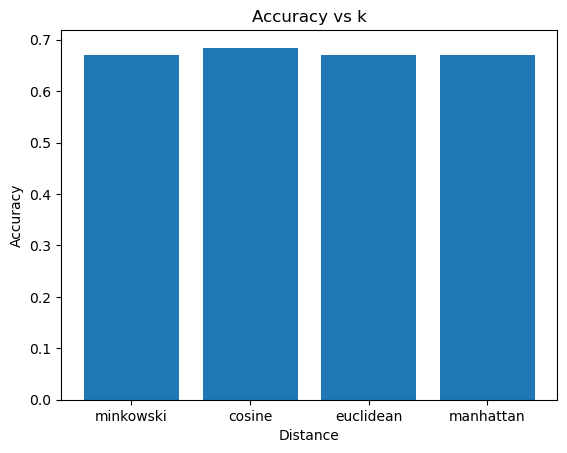

In [11]:
# KNN Cross validation
metrics = ['minkowski','cosine', 'euclidean', 'manhattan']
scores = [] # to store accuracy scores for each k value
for metric in metrics: 
    knn_model = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric=metric)
    score =  cross_val_score(knn_model, X, y)
    scores.append(score.mean()) # append accuracy score for each k value
    
# Plot the accuracy scores for each k value
plt.bar(metrics, scores)
plt.xlabel('Distance') # x-axis label
plt.ylabel('Accuracy') # y-axis label
plt.title('Accuracy vs k') # plot title
plt.show() # show the plot

In [12]:
# KNN
N_NEIGHBORS = 4
knn_model = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
knn_model.fit(X, y)

# Make predictions
y_pred = knn_model.predict(X)

# Evaluate metrics of KNN classifier
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)

print("Accuracy of KNN:", accuracy)
print("Missclassification loss of KNN:", 1-accuracy)
print("Precision of KNN:", precision)

Accuracy of KNN: 0.8166539343009931
Missclassification loss of KNN: 0.1833460656990069
Precision of KNN: 0.8987730061349694


# Question 4

In [13]:
red_wine = pd.read_csv("./winequality-red.csv", sep=';') # load red wine csv file
white_wine = pd.read_csv("./winequality-white.csv", sep=';') # load white wine csv file

In [14]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
white_wine.shape

(4898, 12)

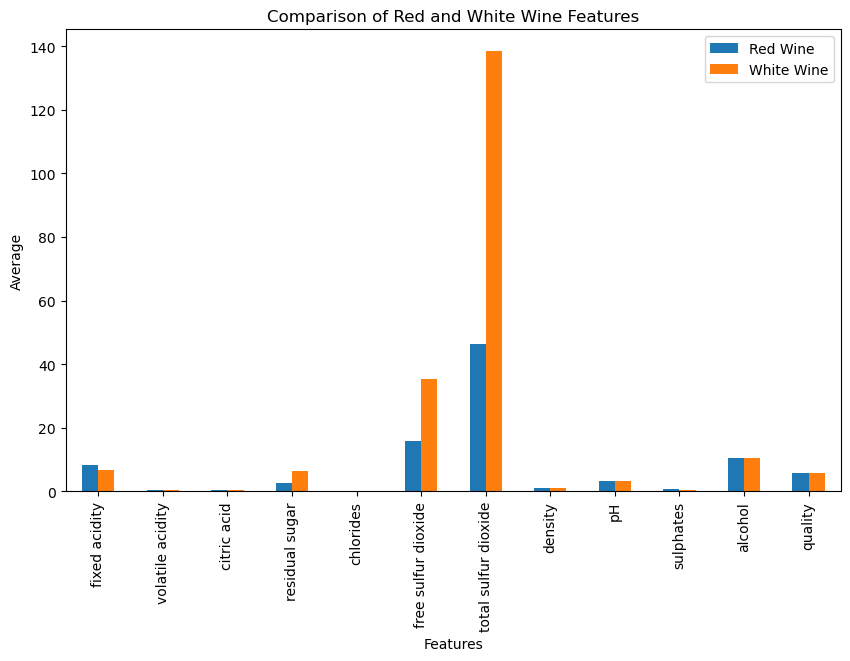

In [16]:
# Calculate the average of each feature for the red and white wines separately and make a
# comparison using a bar graph showing the two wines together.
red_wine_mean = red_wine.mean()
white_wine_mean = white_wine.mean()
red_wine_mean = red_wine_mean.to_frame()
white_wine_mean = white_wine_mean.to_frame()
# create a new data frame from 2 data frames
comparison_df = pd.concat([red_wine_mean, white_wine_mean], axis=1)
comparison_df.columns = ['Red Wine', 'White Wine']
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Features') # x-axis label
plt.ylabel('Average') # y-axis label
plt.title('Comparison of Red and White Wine Features') # plot title
plt.show() # show the plot

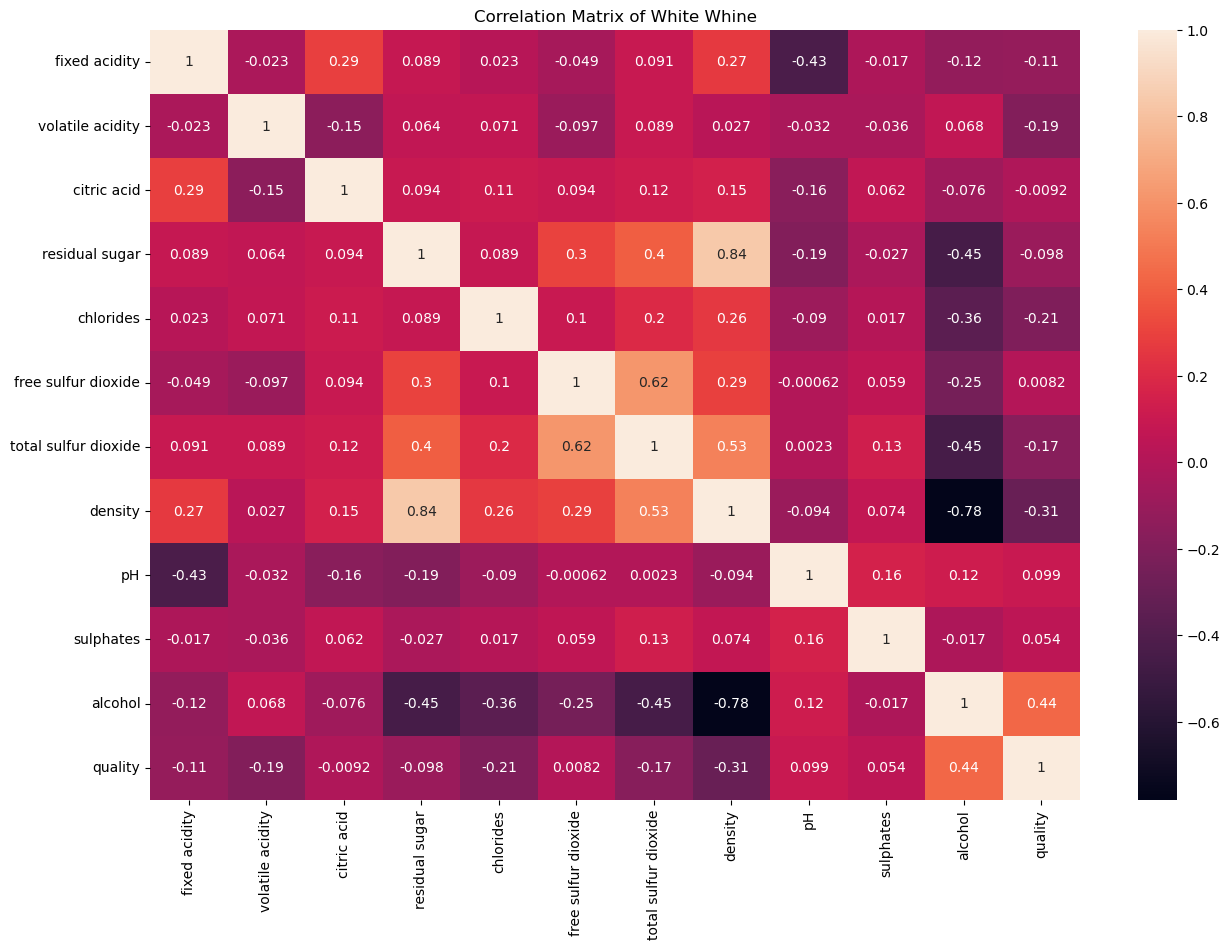

In [17]:
# figsize(10, 6)
plt.figure(figsize=(15,10))
sns.heatmap(white_wine.corr(), annot=True) 
plt.savefig('white_whine_corr.png') #save as png
plt.title('Correlation Matrix of White Whine') #plot title
plt.show()

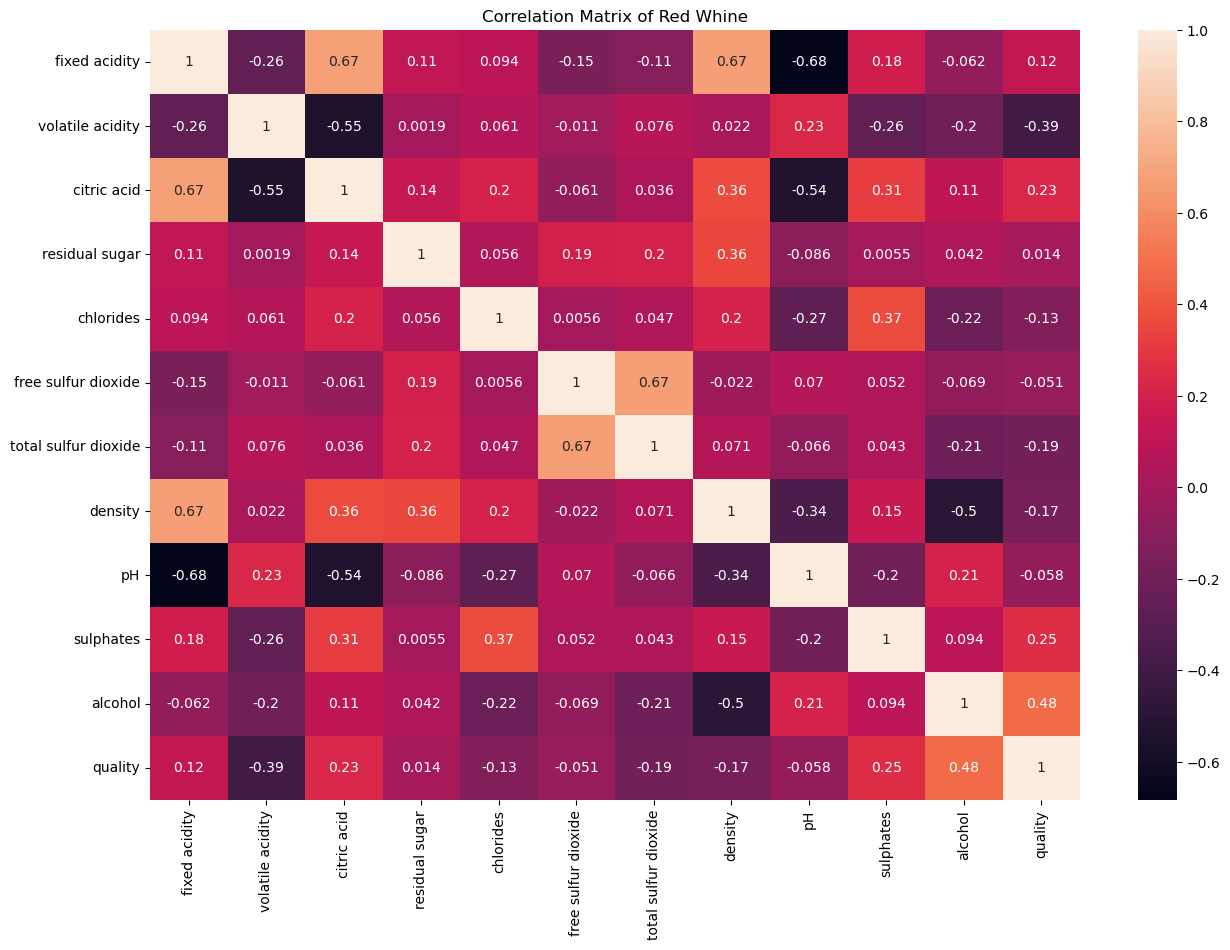

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(red_wine.corr(), annot=True) 
plt.savefig('red_wine_corr.png') #save as png
plt.title('Correlation Matrix of Red Whine') #plot title
plt.show()

In [20]:
red_wine_y =  red_wine['quality'] # target variable for red wine
white_wine_y =  white_wine['quality'] # target variable for white wine
red_wine_X = red_wine.drop('quality', axis=1) # features for red wine
white_wine_X = white_wine.drop('quality', axis=1) # features for white wine

In [44]:
def plot_feature_importance(X,y,wine_type):
    # Generate a range of lambda values
    alphas = np.logspace(-4, 4, 100)

    # Initialize lists to store MSE and coefficients for each lambda
    mse_values = []
    coef_values = []

    # Build Lasso with cross-validation for each lambda
    for alpha in alphas:
        lasso = LassoCV(alphas=[alpha], cv=5)
        mse = -cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=5).mean()
        mse_values.append(mse)

        # Fit the model to get coefficient estimates
        lasso.fit(X, y)
        coef_values.append(lasso.coef_)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.plot(alphas, mse_values, label='MSE')
    ax1.set_xscale('log')
    ax1.set_xlabel('Lambda')
    ax1.set_ylabel('Mean Squared Error')
    ax1.set_title(f'MSE vs. Lambda for {wine_type} Wine')
    ax1.legend()

    for i, feature in enumerate(X.columns):
        plt.plot(alphas, [coef[i] for coef in coef_values], label=feature)

    ax2.set_xscale('log')
    ax2.set_xlabel('Lambda')
    ax2.set_ylabel('Coefficient Estimate')
    ax2.set_title(f'Parameter Estimates vs. Lambda for {wine_type} Wine')
    ax2.legend()
    plt.show()

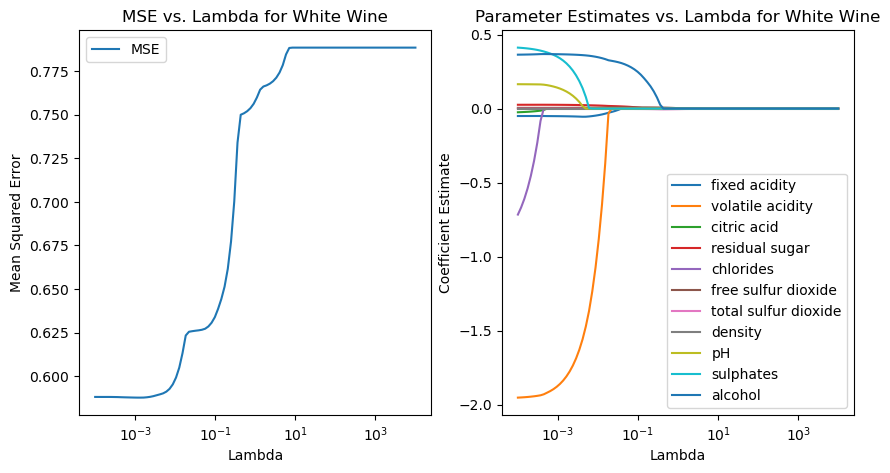

None


In [49]:
res = plot_feature_importance(white_wine_X, white_wine_y, "White") # plot feature importance for white wine
print(res)

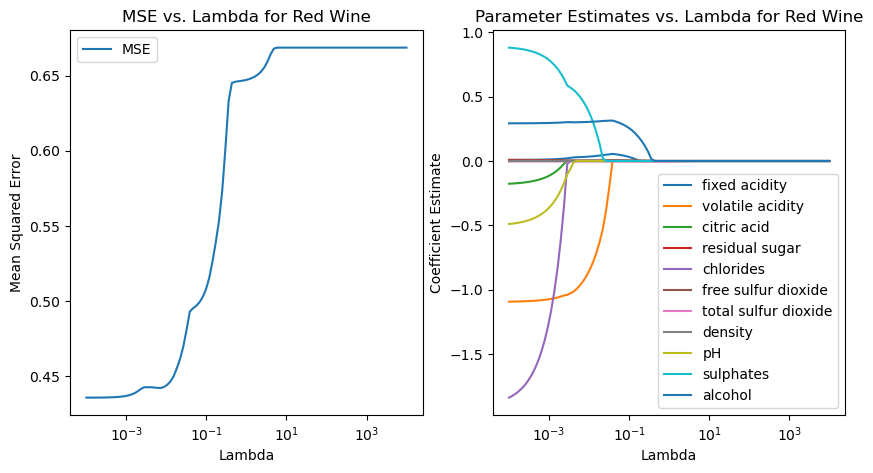

In [46]:
plot_feature_importance(red_wine_X, red_wine_y,"Red") # plot feature importance for red wine

In [50]:
# Generate a range of lambda values
alphas = np.logspace(-4, 4, 100)

# Initialize lists to store MSE and coefficients for each lambda
mse_values = []
coef_values = []

# Build Lasso with cross-validation for each lambda
for alpha in alphas:
    lasso = LassoCV(alphas=[alpha], cv=5)
    mse = -cross_val_score(lasso, red_wine_X, red_wine_y, scoring='neg_mean_squared_error', cv=5).mean()
    mse_values.append(mse)

    # Fit the model to get coefficient estimates
    lasso.fit(red_wine_X, red_wine_y)
    coef_values.append(lasso.coef_)

    # Find the optimal lambda
optimal_alpha_index = np.argmin(mse_values)
optimal_alpha = alphas[optimal_alpha_index]

# Fit the final Lasso model with the optimal lambda
final_lasso_model = LassoCV(alphas=[optimal_alpha], cv=5)
final_lasso_model.fit(red_wine_X, red_wine_y)

# Get selected features (non-zero coefficients)
selected_features = red_wine_X.columns[final_lasso_model.coef_ != 0]

print(selected_features)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


In [51]:
# Generate a range of lambda values
alphas = np.logspace(-4, 4, 100)

# Initialize lists to store MSE and coefficients for each lambda
mse_values = []
coef_values = []

# Build Lasso with cross-validation for each lambda
for alpha in alphas:
    lasso = LassoCV(alphas=[alpha], cv=5)
    mse = -cross_val_score(lasso, white_wine_X, white_wine_y, scoring='neg_mean_squared_error', cv=5).mean()
    mse_values.append(mse)

    # Fit the model to get coefficient estimates
    lasso.fit(white_wine_X, white_wine_y)
    coef_values.append(lasso.coef_)

    # Find the optimal lambda
optimal_alpha_index = np.argmin(mse_values)
optimal_alpha = alphas[optimal_alpha_index]

# Fit the final Lasso model with the optimal lambda
final_lasso_model = LassoCV(alphas=[optimal_alpha], cv=5)
final_lasso_model.fit(white_wine_X, white_wine_y)

# Get selected features (non-zero coefficients)
selected_features = white_wine_X.columns[final_lasso_model.coef_ != 0]

print(selected_features)

Index(['fixed acidity', 'volatile acidity', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')


# 4.4 

In [67]:
KNN_red_wine_X = red_wine_X[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol']]

knn_model = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
knn_model.fit(KNN_red_wine_X, red_wine_y)

# Make predictions
y_pred = knn_model.predict(KNN_red_wine_X)

# # Evaluate metrics of KNN classifier
accuracy = accuracy_score(red_wine_y, y_pred)
# precision = precision_score(red_wine_y, y_pred)

print("Accuracy of KNN Using selected features:", accuracy)
print("Missclassification loss of KNN:", 1-accuracy)

Accuracy of KNN Using selected features: 0.6985616010006254
Missclassification loss of KNN: 0.30143839899937463


In [66]:
print(accuracy)

0.6985616010006254
